In [1]:
# import libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report, roc_auc_score, precision_recall_curve


In [2]:
#Loading the dataset to a Pandas Dataframe

credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
# let's see first 5 rows of the dataset:

credit_card_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# let's see last 5 rows of our dataset:

credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# dataset information:

credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking number of missing values:

credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# Find distribution of Normal transaction or Fraud transaction:

credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [5]:
# Seperating the data:

normal = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [6]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


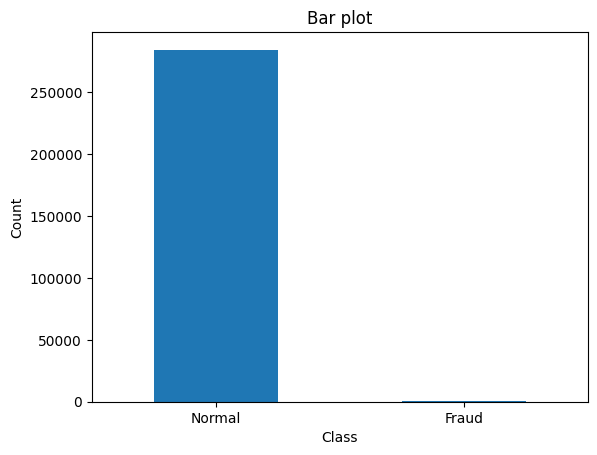

In [ ]:
#visualize the data:

labels = ["Normal", "Fraud"]
count_classes = credit_card_data.value_counts(credit_card_data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Bar plot")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

Above bar plot shows that Data is highly Imbalanced

In [ ]:
# statistical measures of the data:

normal.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


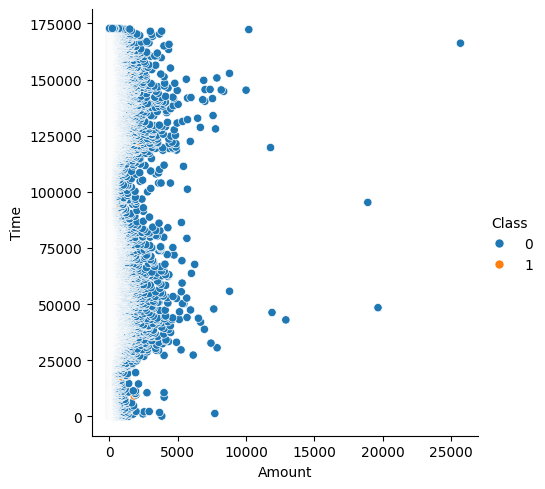

In [ ]:
# visualize the data:

sns.relplot(x = 'Amount' , y = 'Time' , hue = 'Class', data = credit_card_data)

In [ ]:
# Compare values of both transactions:

credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [7]:
# Splitting data into features and targets

X = credit_card_data.drop('Class', axis=1)
Y = credit_card_data['Class']

In [8]:
# splitting the data & scaling:

from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state= 2)


In [9]:
# Combine X_test and Y_test back into one dataframe
test_df = X_test.copy()
test_df["Class"] = Y_test.values

# Save it
test_df.to_csv("test_data.csv", index=False)

test_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
238976,149901.0,2.034724,0.160281,-1.824837,0.531330,0.208304,-1.458796,0.281421,-0.377036,0.634776,...,0.187236,0.668821,-0.051750,-0.189272,0.258107,-0.095150,-0.006139,-0.028016,20.00,0
143962,85762.0,1.363581,-0.606064,0.278276,-0.750067,-1.001708,-0.553569,-0.629966,-0.003119,-0.900882,...,-0.433364,-0.867878,0.070828,0.000648,0.117452,0.954987,-0.067647,-0.005108,11.95,0
179211,123969.0,-1.508502,0.056584,1.127829,-1.125600,2.123570,-1.132288,0.815290,-0.381266,-0.542851,...,0.205729,0.837509,-0.908001,-0.301059,1.105779,-0.098219,-0.157932,-0.252576,9.90,0
121522,76224.0,1.140457,-0.164007,1.229533,0.807598,-0.852002,0.180444,-0.665092,0.179675,0.840590,...,-0.058124,0.091415,0.055075,0.138247,0.201323,0.344273,0.037272,0.024998,8.04,0
104681,69184.0,1.414509,-1.211379,0.602135,-1.079503,-1.698032,-0.519768,-1.104670,0.000795,-1.332388,...,-0.341620,-0.476392,0.123438,0.349785,0.283476,-0.230020,0.046381,0.017223,22.00,0


In [10]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
print(X.shape, X_train_scaled.shape,  X_test_scaled.shape)

(284807, 30) (227845, 30) (56962, 30)


### 1. Logistic Regression

In [ ]:
# Creating Model:

model = LogisticRegression(class_weight='balanced', max_iter=500)

# training the Logistic Regression model with training data:

model.fit(X_train_scaled,Y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
# Model Evaluation

# predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Training Accuracy:", accuracy_score(Y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(Y_test, y_test_pred))

print("\nClassification Report (Test Data):")
print(classification_report(Y_test, y_test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_test_pred))

# ROC-AUC Score (very important for imbalanced data)
y_test_prob = model.predict_proba(X_test_scaled)[:,1]
print("\nROC-AUC Score:", roc_auc_score(Y_test, y_test_prob))

Training Accuracy: 0.9761855647479646
Testing Accuracy: 0.97631754503002

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.95      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962


Confusion Matrix:
[[55520  1344]
 [    5    93]]

ROC-AUC Score: 0.9916867527821484


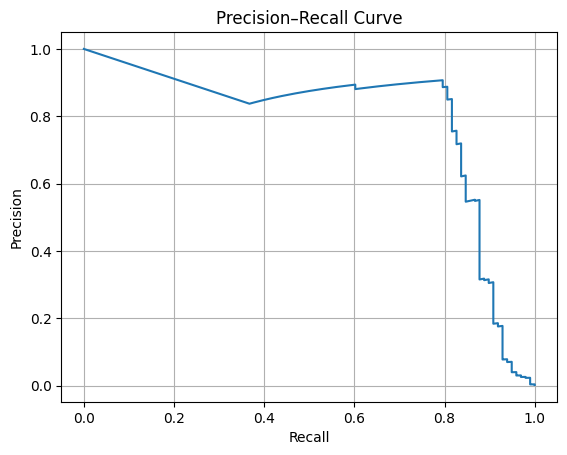

In [ ]:


y_prob = model.predict_proba(X_test_scaled)[:, 1]   # probability of class 1

precision, recall, thresholds = precision_recall_curve(Y_test, y_prob)

plt.plot(recall, precision)
plt.title("Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

In [ ]:
# Threshold Tuning

threshold = 0.5   # try diff values

y_test_pred_thresh = (y_test_prob >= threshold).astype(int)

print(f"\nResults with threshold = {threshold}")
print(confusion_matrix(Y_test, y_test_pred_thresh))
print(classification_report(Y_test, y_test_pred_thresh))



Results with threshold = 0.4
[[54817  2047]
 [    5    93]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.95      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.96      0.53     56962
weighted avg       1.00      0.96      0.98     56962



### Observation about LoR
- Even after using different values of threshold, precision is not improving (precision 0.06) & Noticed that it is decreasing when the value of threshold is less.

- Reason might be: The credit card dataset has PCA components that LR can’t interpret nonlinearly.

### 2. Random Forest

In [ ]:

# RANDOM FOREST MODEL
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    class_weight="balanced",
    random_state=42
)

# train
rf.fit(X_train_scaled, Y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

In [ ]:
# predict
rf_pred = rf.predict(X_test_scaled)
rf_prob = rf.predict_proba(X_test_scaled)[:, 1]

print("\n===== RANDOM FOREST RESULTS =====")
print("Classification Report:")
print(classification_report(Y_test, rf_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, rf_pred))

print("ROC-AUC Score:", roc_auc_score(Y_test, rf_prob))


===== RANDOM FOREST RESULTS =====
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56859     5]
 [   19    79]]
ROC-AUC Score: 0.9717036997691593


### Observation about Random forest
- miss 19 frauds, because it is a Tree-based models struggle with extremely rare classes. RF maximizes overall accuracy, not minority recall.

- Random Forest gave excellent precision but lower recall.

It is very time taking algo

### 3. XGBoost

In [12]:


# compute scale_pos_weight manually (very important)
neg = sum(Y_train == 0)
pos = sum(Y_train == 1)
scale = neg / pos


# XGBOOST MODEL

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale,
    eval_metric="logloss",
    random_state=42
)

# train
xgb.fit(X_train_scaled, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
import joblib

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Save the final model
joblib.dump(xgb, "model.pkl")

['model.pkl']

In [13]:
# predict
xgb_pred = xgb.predict(X_test_scaled)
xgb_prob = xgb.predict_proba(X_test_scaled)[:, 1]

print("\n===== XGBOOST RESULTS =====")
print("Classification Report:")
print(classification_report(Y_test, xgb_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, xgb_pred))

print("ROC-AUC Score:", roc_auc_score(Y_test, xgb_prob))


===== XGBOOST RESULTS =====
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.88      0.81        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56835    29]
 [   12    86]]
ROC-AUC Score: 0.9913482257703307


### Observation about XGBoost
XGBoost gave higher recall and better ROC-AUC.

Since fraud detection prioritizes catching every fraud, hence, XGBoost is better

## SHAP
1. beeswarm summary plot

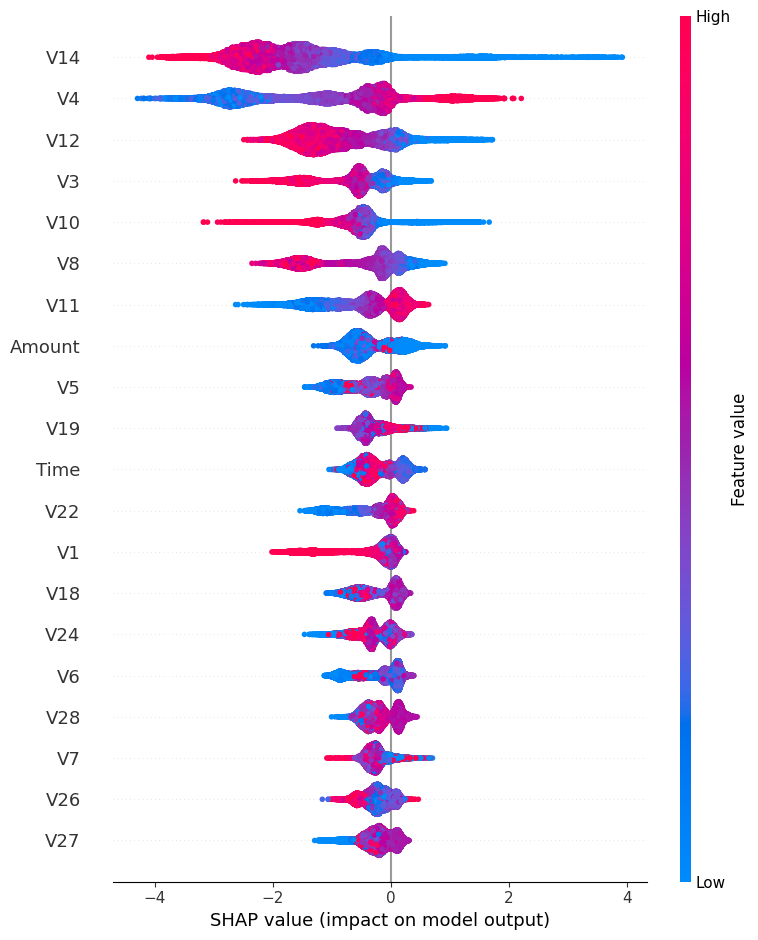

In [14]:
import shap

# initialize shap
shap.initjs()

# use tree explainer (fast, perfect for XGBoost)
explainer = shap.TreeExplainer(xgb)

# compute shap values on test set
shap_values = explainer.shap_values(X_test_scaled)

# ----------------------------
# 1. GLOBAL SUMMARY
# ----------------------------
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


2. SHAP waterfall plot

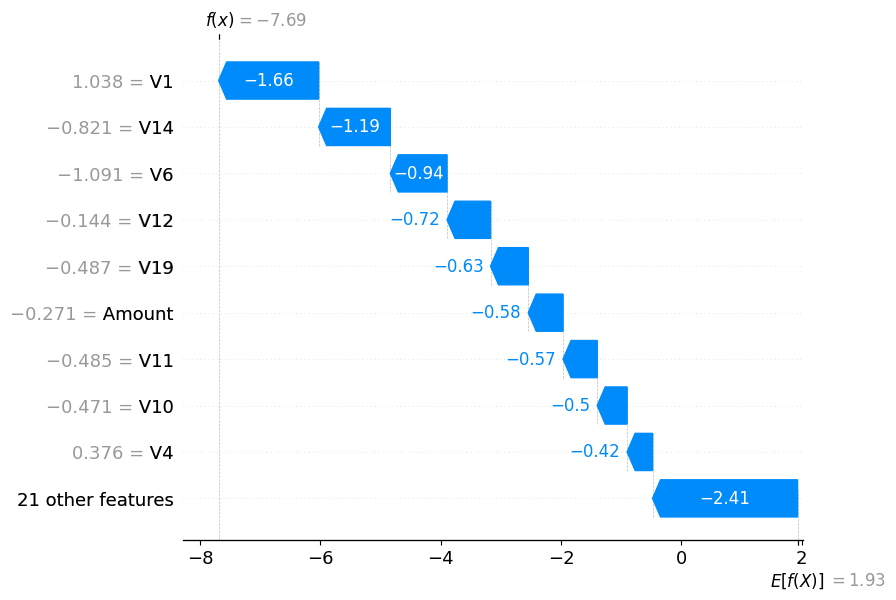

In [15]:
# pick one example
i = 0  # take the first sample from test set

shap.waterfall_plot(
    shap.Explanation(values=shap_values[i],
                     base_values=explainer.expected_value,
                     data=X_test_scaled[i],
                     feature_names=X.columns)
)


In [ ]:
df = credit_card_data.drop(columns=['Class']).head(100)
df.to_csv("test_sample.csv", index=False)


In [ ]:
credit_card_data.head(100)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,64.0,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
96,64.0,0.959602,0.370711,0.888613,2.343244,0.352491,1.365515,-0.277771,0.516053,-0.700929,...,-0.155547,-0.403239,0.356504,-0.696881,-0.198718,-0.220268,0.068546,0.020797,7.55,0
97,67.0,-0.653445,0.160225,1.592256,1.296832,0.997175,-0.343000,0.469937,-0.132470,-0.197794,...,0.038363,0.336449,-0.014883,0.102959,-0.265322,-0.348637,0.011238,-0.049478,19.85,0
98,67.0,-1.494668,0.837241,2.628211,3.145414,-0.609098,0.258495,-0.012189,0.102136,-0.286164,...,-0.140047,0.355044,0.332720,0.718193,-0.219366,0.118927,-0.317486,-0.340783,28.28,0
